# World Happiness Report

## Attribute Information:

Input

- Country  -Name of the country.


- Region - Region the country belongs to.


- Happiness Rank - Rank of the country based on the Happiness Score.


- Happiness Score - A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."


- Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score.


- Family - The extent to which Family contributes to the calculation of the Happiness Score


- Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score


- Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.


- Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score.


- Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.


- Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.


Output
- Status (1: Country is more happy ,0: Country is less happy)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1MQ6EOc1XEPd_KY72p46PKI5xkcZzPVKg'}) # replace the id with id of file you want to access
downloaded.GetContentFile('happinessfinal.csv') 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('happinessfinal.csv')

In [6]:
df.head()

,Country,Region,Happiness Rank,Eco0my (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness_Score,status
0,Denmark,Western Europe,1,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,4.526,0
1,Switzerland,Western Europe,2,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,7.509,1
2,Iceland,Western Europe,3,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,7.501,0
3,0rway,Western Europe,4,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,7.498,0
4,Finland,Western Europe,5,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,7.413,0


In [7]:
df.tail()

,Country,Region,Happiness Rank,Eco0my (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness_Score,status
152,Benin,Sub-Saharan Africa,153,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,3.484,0
153,Afghanistan,Southern Asia,154,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,3.360,0
154,Togo,Sub-Saharan Africa,155,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3.303,0
155,Syria,Middle East and 0rthern Africa,156,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,3.069,0
156,Burundi,Sub-Saharan Africa,157,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,2.905,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Eco0my (GDP per Capita)        157 non-null    float64
 4   Family                         157 non-null    float64
 5   Health (Life Expectancy)       157 non-null    float64
 6   Freedom                        157 non-null    float64
 7   Trust (Government Corruption)  157 non-null    float64
 8   Generosity                     157 non-null    float64
 9   Dystopia Residual              157 non-null    float64
 10  Happiness_Score                157 non-null    float64
 11  status                         157 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1

In [9]:
df.describe()

,Happiness Rank,Eco0my (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness_Score,status
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807,5.140146,0.496815
std,45.466030,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220,1.194437,0.501590
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890,2.119000,0.000000
25%,40.000000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710,4.217000,0.000000
50%,79.000000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740,5.121000,0.000000
75%,118.000000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650,5.987000,1.000000
max,157.000000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720,7.509000,1.000000


In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Eco0my (GDP per Capita)          0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness_Score                  0
status                           0
dtype: int64

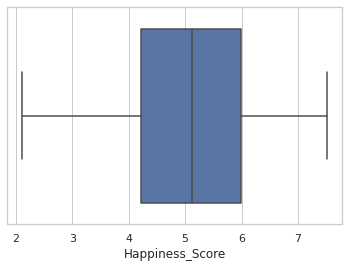

In [11]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Happiness_Score"])
plt.show()

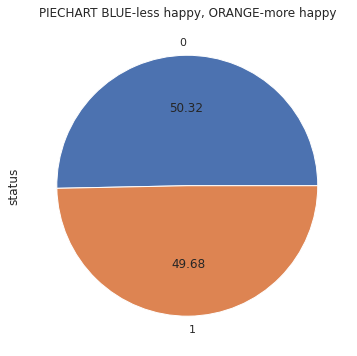

In [12]:
df['status'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("PIECHART BLUE-less happy, ORANGE-more happy");

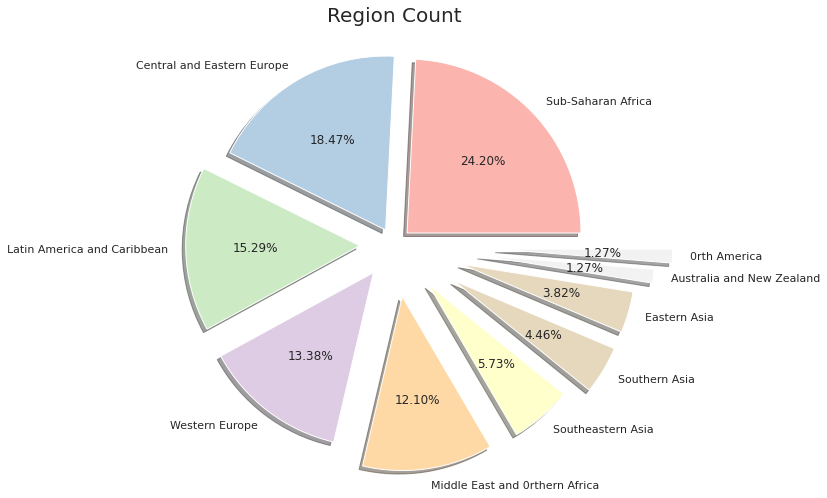

In [13]:
df['Region'].value_counts().plot.pie(autopct = '%.2f%%',figsize = (8,8),explode = [0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.4,0.5,0.6],cmap = 'Pastel1',shadow = True)
plt.title('Region Count',size = 20)
plt.ylabel(' ');

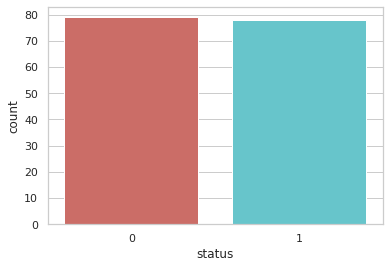

In [14]:
df.status.value_counts()
sns.countplot(x = 'status', data = df, palette = 'hls')
plt.show()

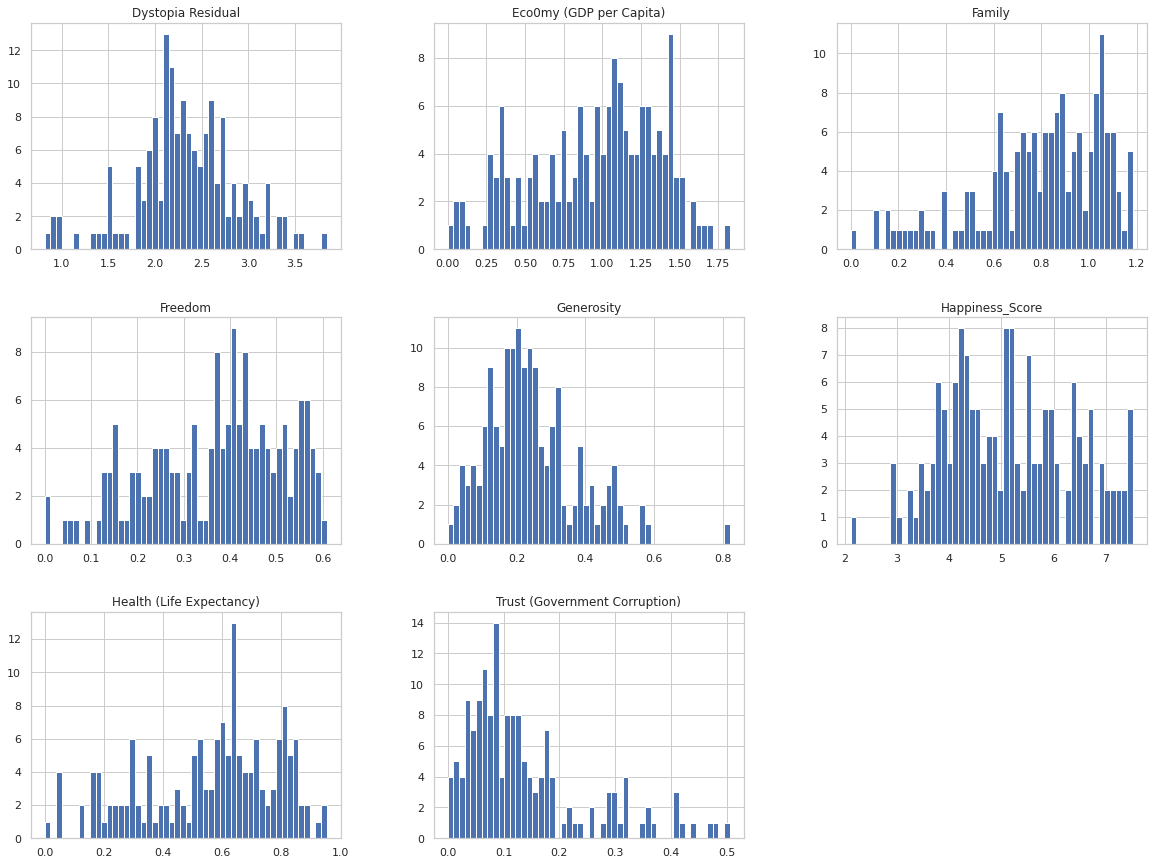

In [15]:
df.hist(['Eco0my (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual','Happiness_Score'],bins=50, figsize=(20,15));

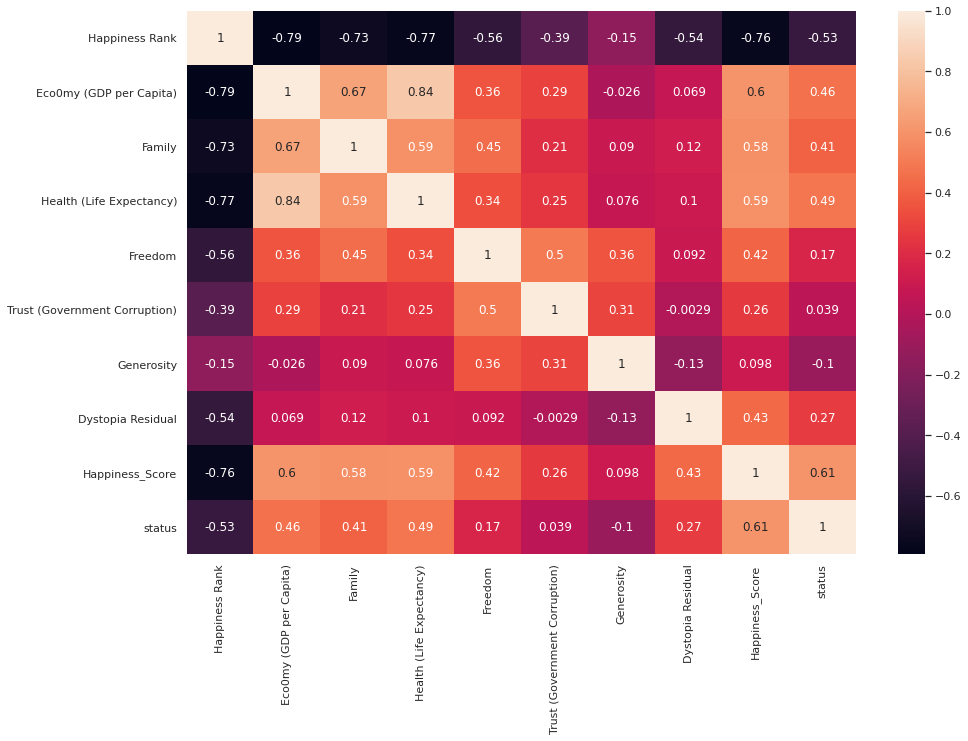

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [0]:
more_happy= df[df['status']==1]
less_happy= df[df['status']==0]

In [18]:
print("Total =", len(df))

print("Number of countries who are more happy  =", len(more_happy))
print("Percentage =", 1.*len(more_happy)/len(df)*100.0, "%")
 
print("Number of countries who are less happy =", len(less_happy))
print("Percentage =", 1.*len(less_happy)/len(df)*100.0, "%")

Total = 157
Number of countries who are more happy  = 78
Percentage = 49.681528662420384 %
Number of countries who are less happy = 79
Percentage = 50.318471337579616 %


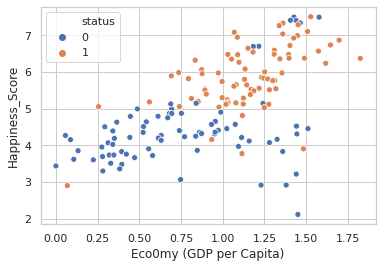

In [19]:
sns.scatterplot(df['Eco0my (GDP per Capita)'], df['Happiness_Score'], hue = df['status'])

# LINEAR REGRESSION

In [0]:
abc=df['Eco0my (GDP per Capita)']

In [0]:
X=pd.DataFrame(abc)

In [22]:
X

,Eco0my (GDP per Capita)
0,1.44178
1,1.52733
2,1.42666
3,1.57744
4,1.40598
...,...
152,0.39499
153,0.38227
154,0.28123
155,0.74719


In [0]:
abc1=df['Happiness_Score']

In [0]:
y=pd.DataFrame(abc1)

In [25]:
y

,Happiness_Score
0,4.526
1,7.509
2,7.501
3,7.498
4,7.413
...,...
152,3.484
153,3.360
154,3.303
155,3.069


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

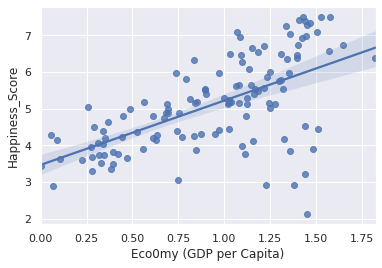

In [29]:
import seaborn as sns
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
dataframe_training['Eco0my (GDP per Capita)'] = X_train['Eco0my (GDP per Capita)']
dataframe_training['Happiness_Score'] = y_train
ax = sns.regplot(x="Eco0my (GDP per Capita)", y="Happiness_Score", data= dataframe_training)

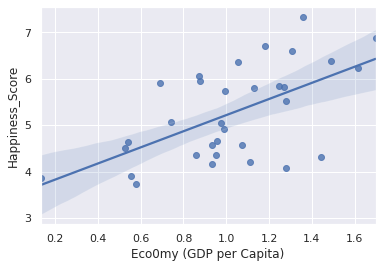

In [30]:
dataframe_test = pd.DataFrame()
dataframe_test['Eco0my (GDP per Capita)'] = X_test['Eco0my (GDP per Capita)']
dataframe_test['Happiness_Score'] = y_test
ax = sns.regplot(x="Eco0my (GDP per Capita)", y="Happiness_Score", data= dataframe_test)

In [31]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [[1.75177072]]
Intercept: 
 [3.47053986]


In [0]:
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [33]:
mean_absolute_percentage_error(y_test, y_pred)

13.071892058406325

In [34]:
print("accuracy=",100-mean_absolute_percentage_error(y_test, y_pred))

accuracy= 86.92810794159368


In [35]:
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 0.6472040014028766


In [36]:
print("Variance score: {}".format(r2_score(y_test, y_pred)))

Variance score: 0.3478221688259212


In [37]:
print("r2 score: {}".format(r2_score(y_test,y_pred)))

r2 score: 0.3478221688259212


In [0]:
import statsmodels.api as sm

In [0]:
x = sm.add_constant(X)

In [0]:
results = sm.OLS(endog = y, exog=x).fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     89.10
Date:                Mon, 04 May 2020   Prob (F-statistic):           5.42e-17
Time:                        03:40:34   Log-Likelihood:                -214.51
No. Observations:                 157   AIC:                             433.0
Df Residuals:                     155   BIC:                             439.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.4718      0.192     18.038      0.000       3.092       3.852
Eco0my (GDP per Capita)     1.7490      0.185      9.440      0.000       1.383       2.115
==============================================================================
Omnibus:                       28.448   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.842
Skew:                          -0.942   Prob(JB):                     3.02e-10
Kurtosis:                       4.775   Cond. No.                         4.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# POLYNOMIAL REGRESSION

In [0]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1) 

In [43]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 5) #try 2,3 and 4
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

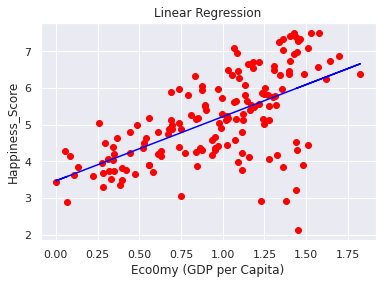

In [45]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness_Score')
plt.show()


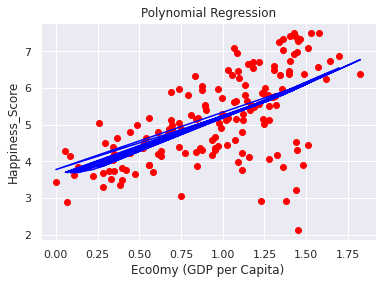

In [46]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness_Score')
plt.show()

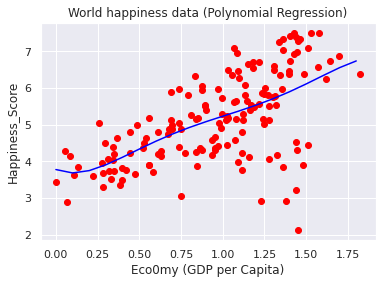

In [47]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color = 'blue')
plt.title('World happiness data (Polynomial Regression)')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness_Score')
plt.show()

In [48]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)

X_pf=pf.fit_transform(x)

lr=LinearRegression()

lr.fit(X_pf,y)

pred=lr.predict(X_pf)

rmse =np.sqrt(mean_squared_error(y,pred))
r2 = r2_score(y,pred)
print(rmse)
print(r2)

0.9487362133892853
0.3650495038000793


In [49]:
linear_regressor.predict(np.array(6.5).reshape(-1, 1))

array([[14.84054572]])

In [50]:
linear_regressor_2.predict(polynomial_regressor.fit_transform(np.array(6.5).reshape(-1, 1)))

array([[-7721.24605312]])

# Logistic Regression

In [0]:
X = df.iloc[:, [3, 10]].values
y = df.iloc[:, 11].values

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [54]:
X_train

array([[ 1.5066165 ,  1.203445  ],
       [-1.43218926, -0.42426949],
       [ 0.41298015,  0.12670095],
       [-0.27548142,  0.00911579],
       [ 1.28751965, -1.03571229],
       [ 0.84028101,  0.52733036],
       [ 0.18585956,  1.12617475],
       [-1.17275486, -1.23812673],
       [ 0.86931237,  0.52985004],
       [ 1.14953556,  1.98286659],
       [-1.69787246, -0.06983424],
       [ 0.43714864,  0.79273685],
       [-1.63550608, -1.54300824],
       [ 0.93313761,  1.7863314 ],
       [ 0.19570688,  0.03095303],
       [-1.46729922, -0.79550262],
       [-1.52066928, -1.36495072],
       [-1.54136081, -1.17681447],
       [-0.96968119, -1.02815324],
       [-1.36145874, -1.09870433],
       [ 0.69913605,  0.00407643],
       [-0.49046914, -0.22269494],
       [-0.2460124 ,  0.04691102],
       [-0.78581587, -0.84085689],
       [-0.44444203, -0.75938718],
       [-1.48988728, -0.62584404],
       [ 0.34132568, -0.97943939],
       [ 0.04663544,  0.7020283 ],
       [ 0.15906512,

In [55]:
y_train

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0])

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_proba = classifier.predict_proba(X_train)
y_proba

array([[0.11901746, 0.88098254],
       [0.77763815, 0.22236185],
       [0.44026336, 0.55973664],
       [0.55322484, 0.44677516],
       [0.67207119, 0.32792881],
       [0.28803767, 0.71196233],
       [0.21338691, 0.78661309],
       [0.88939428, 0.11060572],
       [0.28470982, 0.71529018],
       [0.06012908, 0.93987092],
       [0.7230224 , 0.2769776 ],
       [0.26306061, 0.73693939],
       [0.93423984, 0.06576016],
       [0.08166126, 0.91833874],
       [0.49292576, 0.50707424],
       [0.84582706, 0.15417294],
       [0.91627083, 0.08372917],
       [0.89864022, 0.10135978],
       [0.85141112, 0.14858888],
       [0.88165617, 0.11834383],
       [0.44320911, 0.55679089],
       [0.64189029, 0.35810971],
       [0.53891348, 0.46108652],
       [0.80879512, 0.19120488],
       [0.76675728, 0.23324272],
       [0.81968319, 0.18031681],
       [0.74771254, 0.25228746],
       [0.32199212, 0.67800788],
       [0.51088349, 0.48911651],
       [0.36541876, 0.63458124],
       [0.

In [58]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0])

In [59]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)

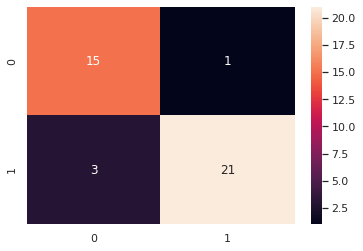

In [61]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [62]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test))

Accuracy: 0.9


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.95      0.88      0.91        24

    accuracy                           0.90        40
   macro avg       0.89      0.91      0.90        40
weighted avg       0.91      0.90      0.90        40



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


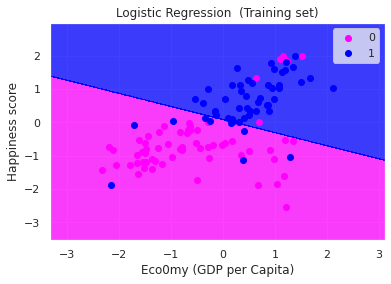

In [64]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Logistic Regression  (Training set)')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


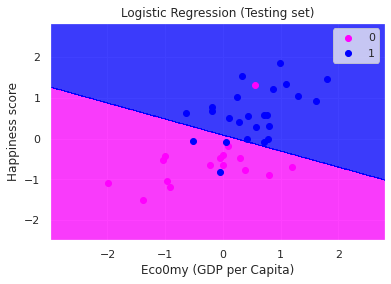

In [65]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

# SVM

In [66]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

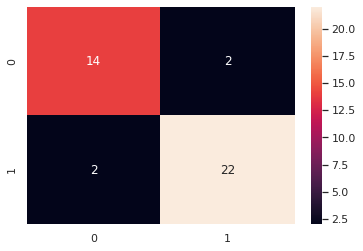

In [69]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [70]:
cm

array([[14,  2],
       [ 2, 22]])

In [71]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy is :",acc)

Accuracy is : 0.9


In [72]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.92      0.92      0.92        24

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


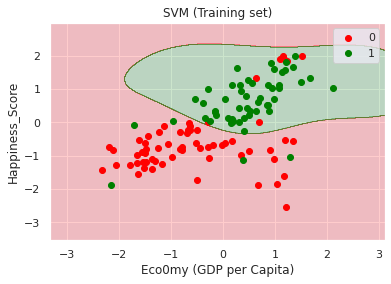

In [73]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


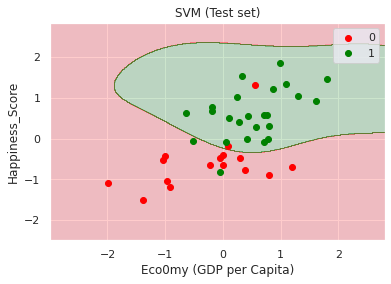

In [74]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

# KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

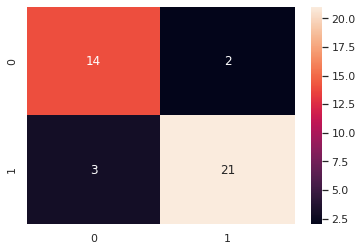

In [78]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [79]:
print("Confusion Matrix is:",cm)

Confusion Matrix is: [[14  2]
 [ 3 21]]


In [80]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy is :",acc)

Accuracy is : 0.875


In [81]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.91      0.88      0.89        24

    accuracy                           0.88        40
   macro avg       0.87      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


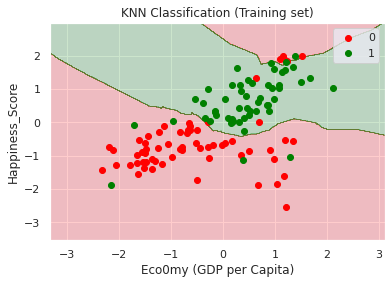

In [82]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Training set)')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


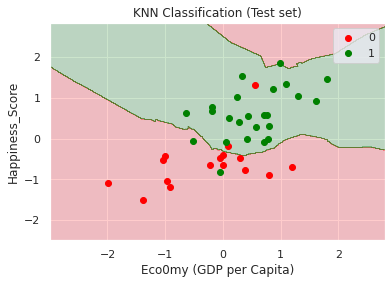

In [83]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

# NAIVE BAYES

In [84]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

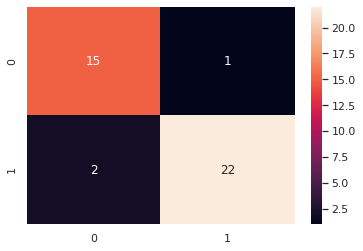

In [87]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [88]:
cm

array([[15,  1],
       [ 2, 22]])

In [89]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy is :",acc)

Accuracy is : 0.925


In [90]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.96      0.92      0.94        24

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


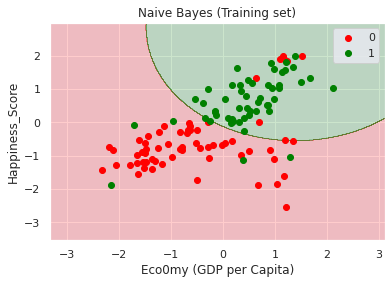

In [91]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness_Score')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


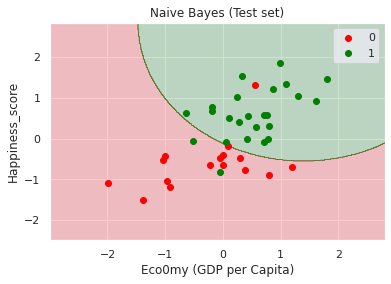

In [92]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Eco0my (GDP per Capita)')
plt.ylabel('Happiness_score')
plt.legend()
plt.show()

# ANALYSIS

- Accuracy of model in svm is 90%
- Accuracy of model in knn is 87.5%
- Accuracy of model in Naive Bayes is 92.5%

- Therefore , Naive bayes is best classifier of our model

# Thank You